In [5]:

#importar librerías
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np

Model: "od_esolver_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 30)                60        
                                                                 
 dense_91 (Dense)            (None, 40)                1240      
                                                                 
 dense_92 (Dense)            (None, 3)                 123       
                                                                 
 dense_93 (Dense)            (None, 1)                 4         
                                                                 
Total params: 1,427
Trainable params: 1,427
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
4/4 [==============================] - 1s 3ms/step - my_loss: 40.0102
Epoch 2/600
4/4 [==============================] - 0s 3ms/step - my_loss: 34.2738
Epoch 3/600
4/4 [==

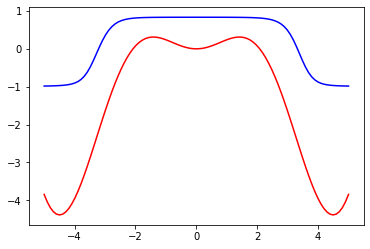

In [36]:
#Ejercicio 2. Inciso a)
class ODEsolver(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'my_loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)

    with tf.GradientTape() as tape:
      with tf.GradientTape() as tape2:
        tape2.watch(x)
        y_pred = self(x, training = True)
      dy = tape2.gradient(y_pred, x)
      x_o = tf.zeros((batch_size, 1))
      y_o = self(x_o, training = True)
      eq = x*dy + y_pred - x**2 * tf.math.cos(x)
      ic = y_o 
      loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic)

    grads = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    self.loss_tracker.update_state(loss)

    return {'my_loss': self.loss_tracker.result()}

model = ODEsolver()

model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(40, activation='tanh'))
#model.add(Dense(30, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='tanh'))

model.summary()

model.compile(optimizer=RMSprop(),metrics=['loss'])
x=tf.linspace(-5,5,100)
history = model.fit(x,epochs=600, verbose=1)

x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a, color='b', label='Solución real')
plt.plot(x_testv,(((x*x -2)*np.sin(x))/x) + 2*np.cos(x), color='r', label='Solución real')
plt.show()

  

In [ ]:

#Ejercicio 2 inciso b)  
class ODEsolver(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'my_loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -5, maxval = 5)

    with tf.GradientTape() as tape:
      with tf.GradientTape() as tape2:
        tape2.watch(x)
        y_pred = self(x, training = True)
      dy = tape2.gradient(y_pred, x)
      x_o = tf.zeros((batch_size, 1))
      y_o = self(x_o, training = True)
     # eq = ---------
      ic = y_o 
      loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic)

    grads = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    self.loss_tracker.update_state(loss)

    return {'my_loss': self.loss_tracker.result()}

model = ODEsolver()

model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.summary()

model.compile(optimizer=RMSprop(),metrics=['loss'])
x=tf.linspace(-5,5,100)
history = model.fit(x,epochs=600, verbose=1)

x_testv = tf.linspace(-5,5,100)
a=model.predict(x_testv)
plt.plot(x_testv,a, color='b', label='Solución real')
plt.plot(x_testv,(-----------))
plt.show()